In [1]:
import numpy as np
import pickle

%matplotlib inline
from matplotlib import pyplot as plt

In [24]:
with open('./random_timepoints/rand_41.pkl','rb') as f:
    x, t, error_list, theta_list, estimated_theta, true_theta, inferred_gvec, errors, em_param, data_param, euler_param, sim_param = pickle.load(f)

(10, 41, 1)


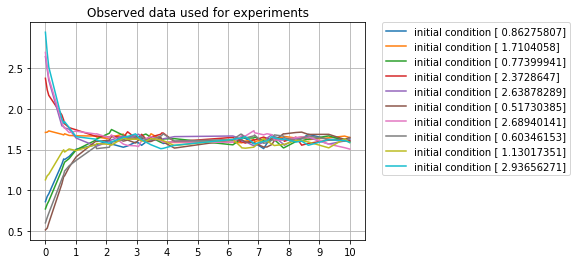

In [25]:
print(x.shape)
fig = plt.figure()
ax = fig.gca()
ax.set_xticks(np.arange(0, 11, 1))
ax.set_yticks(np.arange(-1.0, 3.0, 0.5))

for i in range(10):
    plt.plot(t[i, :], x[i, :, 0], label='initial condition ' + str(euler_param.ic[i]))

plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.)
plt.title('Observed data used for experiments')
plt.grid()

In [26]:
print(error_list)
print(np.transpose(estimated_theta.hermite))
print(np.transpose(true_theta.hermite))
print(np.transpose(estimated_theta.ordinary))
print(np.transpose(true_theta.ordinary))

[4.8056552843077549, 1.0185702317539758, 0.52314508029478501, 0.05926075815029485, 0.024854824499997347, 0.5182879884150362, 0.44489912473489507, 0.071572728954054976, 0.065947206840259454, 0.25554167842667758, 0.5994788576575899, 0.64952969726732146, 0.1123876112306883, 0.030131713713751552, 0.53385881618422859, 0.14488663460099457, 0.48100658133368063, 0.047740586345329052, 1.0802339164231636, 1.1562903831944555, 0.40527977273011234, 0.43688165543941027, 0.037843701783059167, 0.20442212369720261, 0.12308897000392241, 0.67076415535608735, 0.12070646247492268, 0.062528837944545237, 0.11784264819634636, 0.15317880574936502, 0.85936465846755861, 0.59331422314895832, 0.43826334072379852, 1.0850823529844364, 0.71045321108557247, 0.43873296511323651, 0.025109286317842188, 0.8974569093578314, 0.15717804657413537, 0.053814331208252818, 0.51555202312741411, 1.0787401892305994, 1.237788567878694, 1.9069419461658854, 0.92596217273057368, 0.21658037648479384, 0.75282919104961965, 0.83174271472461

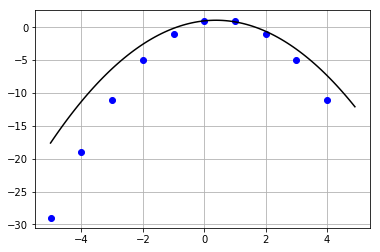

In [27]:
def f(theta, x):
    return (theta[0, 0] + theta[1, 0]*x + theta[2, 0]*(x**2) + theta[3, 0]*(x**3))

x1 = np.arange(-5.0, 5.0, 1)
x2 = np.arange(-5.0, 5.0, .1)

fig = plt.figure()
ax = fig.gca()
plt.plot(x1, f(true_theta.ordinary, x1), 'bo', x2, f(estimated_theta.ordinary, x2), 'k')
plt.grid()
plt.show()

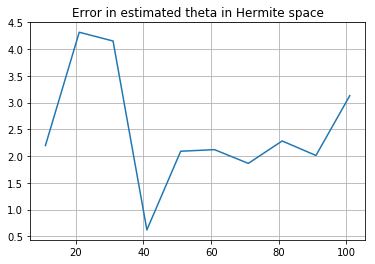

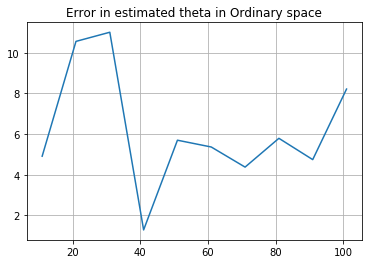

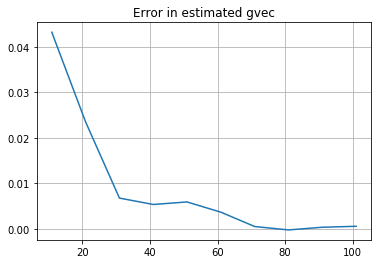

In [28]:
# error trajectories for random time points
meta_error_list = []
for i in range(1, 11):
    with open('./random_timepoints/rand_' + str(i*10+1) + '.pkl','rb') as f:
        x, t, error_list, theta_list, estimated_theta, true_theta, inferred_gvec, errors, em_param, data_param, euler_param, sim_param = pickle.load(f)
    meta_error_list.append((x.shape, error_list, theta_list, estimated_theta, true_theta, inferred_gvec, errors, em_param, data_param, euler_param, sim_param))

parval = meta_error_list[0][0][0]
error_plot = np.zeros((3, parval))
numpoints = np.zeros(parval)
for i in range(parval):
    numpoints[i] = meta_error_list[i][0][1]
    error_plot[0, i] = meta_error_list[i][6][0]
    error_plot[1, i] = meta_error_list[i][6][1]
    error_plot[2, i] = meta_error_list[i][6][4]
    
fig = plt.figure()
ax = fig.gca()
plt.plot(numpoints, error_plot[0, ])
plt.title('Error in estimated theta in Hermite space')
plt.grid()
plt.show()

plt.plot(numpoints, error_plot[1, ])
plt.title('Error in estimated theta in Ordinary space')
plt.grid()
plt.show()

plt.plot(numpoints, error_plot[2, ])
plt.title('Error in estimated gvec')
plt.grid()
plt.show()

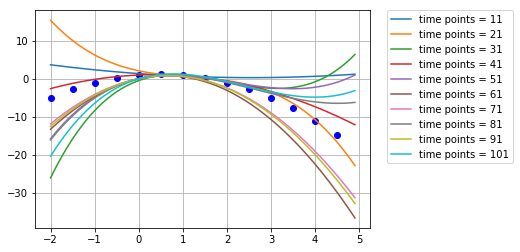

In [19]:
def f(theta, x):
    return (theta[0, 0] + theta[1, 0]*x + theta[2, 0]*(x**2) + theta[3, 0]*(x**3))

x1 = np.arange(-2.0, 5.0, 0.5)
x2 = np.arange(-2.0, 5.0, 0.1)

fig = plt.figure()
ax = fig.gca()
plt.plot(x1, f(np.array(meta_error_list[0][4].ordinary), x1), 'bo')
for i in range(parval):
    plt.plot(x2, f(np.array(meta_error_list[i][3].ordinary), x2), label='time points = '+str(meta_error_list[i][0][1]))

plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.)
plt.grid()
plt.show()